<a href="https://colab.research.google.com/github/Hasifa1/Machine-learning-models/blob/main/Employee_study_hours_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Employee_StudyHours.csv')
df.head()

,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0


In [89]:
df.tail()

,Hours,Scores
27,1.3,19.0
28,2.6,30.0
29,6.1,63.0
30,NaN,NaN
31,5.6,60.0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   30 non-null     float64
 1   Scores  30 non-null     float64
dtypes: float64(2)
memory usage: 640.0 bytes


In [91]:
df.describe()

,Hours,Scores
count,30.000000,30.000000
mean,4.810000,51.466667
std,2.460214,25.045797
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.650000,50.500000
75%,6.700000,73.500000
max,9.200000,95.000000


In [92]:
df.isnull().sum()

Hours     2
Scores    2
dtype: int64

In [93]:
df.shape

(32, 2)

<function matplotlib.pyplot.show(*args, **kw)>

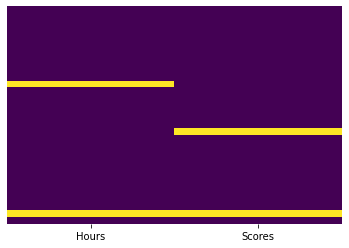

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  return plt.show
get_heatmap(df)

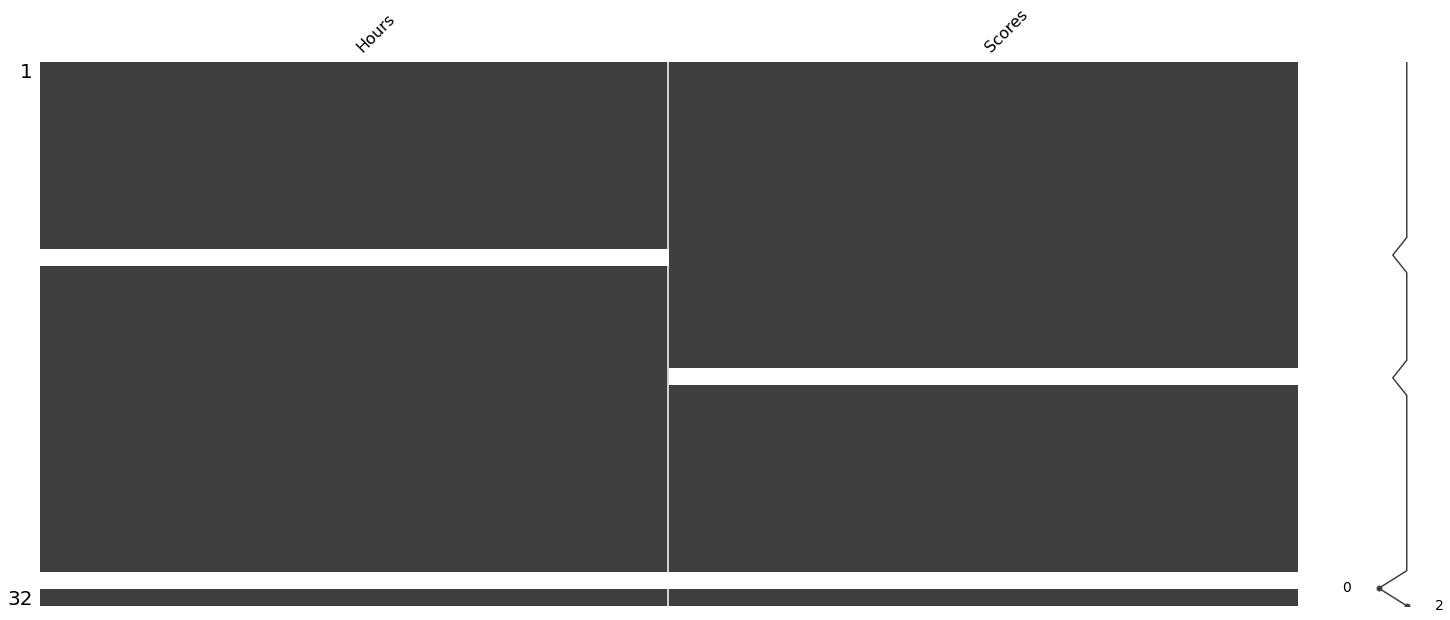

In [101]:
import missingno as msn
msn.matrix(df)

In [102]:
meh=df['Hours'].mean()

In [103]:
print(meh)

4.8100000000000005


In [104]:
mes=df['Scores'].mean()

In [105]:
print(mes)

51.46666666666667


In [106]:
import math
df['Hours']=df['Hours'].fillna(math.floor(meh))

In [107]:
df.isnull().sum()

Hours     0
Scores    2
dtype: int64

In [108]:
df['Scores']=df['Scores'].fillna(math.floor(mes))

In [109]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [110]:
#X=df['Hours']
#Y=df['Scores']
X=df.iloc[:,:-1].values
Y=df.iloc[:,1:].values


In [111]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [4. ]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [3.4]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]
 [1.3]
 [2.6]
 [6.1]
 [4. ]
 [5.6]]


In [112]:
print(Y)

[[21.]
 [47.]
 [27.]
 [75.]
 [30.]
 [20.]
 [88.]
 [60.]
 [81.]
 [25.]
 [85.]
 [85.]
 [62.]
 [41.]
 [42.]
 [17.]
 [95.]
 [30.]
 [51.]
 [24.]
 [67.]
 [69.]
 [30.]
 [54.]
 [35.]
 [76.]
 [86.]
 [19.]
 [30.]
 [63.]
 [51.]
 [60.]]


In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [114]:
X_train

array([[2.7],
       [2.6],
       [3.5],
       [4.8],
       [1.1],
       [7.8],
       [8.9],
       [2.7],
       [7.7],
       [5.1],
       [4.5],
       [3.8],
       [8.3],
       [6.1],
       [3.3],
       [6.1],
       [1.9],
       [3.2],
       [8.5],
       [3.4],
       [5.9],
       [9.2]])

In [115]:
Y_train

array([[30.],
       [30.],
       [30.],
       [54.],
       [17.],
       [86.],
       [95.],
       [25.],
       [85.],
       [47.],
       [41.],
       [35.],
       [81.],
       [67.],
       [42.],
       [63.],
       [24.],
       [27.],
       [75.],
       [51.],
       [62.],
       [88.]])

In [116]:
X_test

array([[7.4],
       [2.5],
       [6.9],
       [4. ],
       [5.6],
       [2.5],
       [1.3],
       [5.5],
       [4. ],
       [1.5]])

In [117]:
Y_test

array([[69.],
       [21.],
       [76.],
       [85.],
       [60.],
       [30.],
       [19.],
       [60.],
       [51.],
       [20.]])

In [118]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [119]:
model.fit(X_train,Y_train)

LinearRegression()

In [120]:
y_pred=model.predict(X_test)#testing with x_test

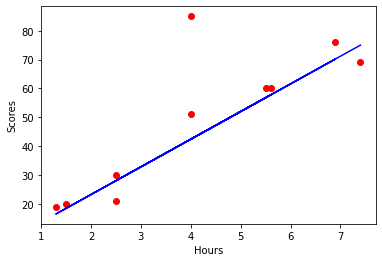

In [121]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,y_pred,color='blue')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [122]:
tr_accuracy=model.score(X_train,Y_train)
print(tr_accuracy)

0.9355804730838678


In [123]:
tst_acc=model.score(X_test,Y_test)
print(tst_acc)

0.6346009223940909


In [125]:
hrs=float(input('enter number of hours:'))
pred_score=model.predict([[hrs]])
print('score estimated is',math.floor(pred_score))

enter number of hours:5
score estimated is 52


In [126]:
print(model.score(X,Y)*100)

84.39245264963742


In [127]:
print(model.score(X_train,Y_train)*100)

93.55804730838678


In [128]:
print(model.score(X_test,Y_test)*100)

63.46009223940909
